<a href="https://colab.research.google.com/github/kenyam1979/Test-colab/blob/main/Test_R_with_BQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quick test for bigquery from R on Colab

##Initialization

In [ ]:
install.packages("bigrquery")
install.packages("wk")
library(bigrquery)
library(wk)
library(tidyverse)

Note: The below is added to fix some errors for using bigquery library

In [ ]:
if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")) {
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  options(rlang_interactive=TRUE)
}

In [ ]:
bq_auth(use_oob = TRUE, cache = FALSE)


##Query setting

In [ ]:
projectid <- "********"
sql <- "SELECT * FROM `bigquery-public-data.covid19_open_data.covid19_open_data`　WHERE country_code='JP' AND aggregation_level=0"

In [ ]:
tb <- bq_project_query(projectid, sql)
df <- bq_table_download(tb)


Auto-refreshing stale OAuth token.

Warning message in as.integer.integer64(x):
“NAs produced by integer overflow”
Warning message in as.integer.integer64(x):
“NAs produced by integer overflow”
Warning message in as.integer.integer64(x):
“NAs produced by integer overflow”
Warning message in as.integer.integer64(x):
“NAs produced by integer overflow”
Warning message in as.integer.integer64(x):
“NAs produced by integer overflow”


##Data manipulation


In [ ]:
head(df)

location_key,date,place_id,wikidata_id,datacommons_id,country_code,country_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level,⋯,cumulative_vaccine_doses_administered_pfizer,new_persons_fully_vaccinated_moderna,cumulative_persons_fully_vaccinated_moderna,new_vaccine_doses_administered_moderna,cumulative_vaccine_doses_administered_moderna,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,location_geometry
<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<wk_wkt>
JP,2020-07-24,ChIJLxl_1w9OZzQRRFJmfNR1QvU,Q17,country/JPN,JP,Japan,JP,JPN,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,POINT (136 35)
JP,2020-07-25,ChIJLxl_1w9OZzQRRFJmfNR1QvU,Q17,country/JPN,JP,Japan,JP,JPN,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,POINT (136 35)
JP,2021-02-27,ChIJLxl_1w9OZzQRRFJmfNR1QvU,Q17,country/JPN,JP,Japan,JP,JPN,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,POINT (136 35)
JP,2021-02-28,ChIJLxl_1w9OZzQRRFJmfNR1QvU,Q17,country/JPN,JP,Japan,JP,JPN,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,POINT (136 35)
JP,2020-02-02,ChIJLxl_1w9OZzQRRFJmfNR1QvU,Q17,country/JPN,JP,Japan,JP,JPN,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,POINT (136 35)
JP,2020-07-23,ChIJLxl_1w9OZzQRRFJmfNR1QvU,Q17,country/JPN,JP,Japan,JP,JPN,0,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,POINT (136 35)


Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


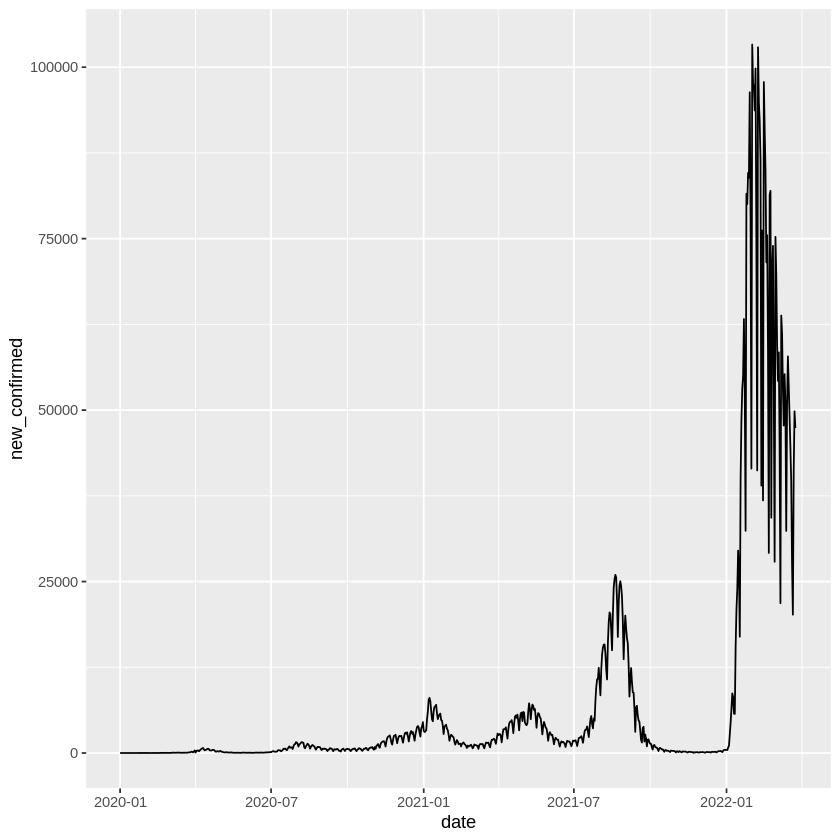

In [ ]:
df %>% ggplot() + geom_line(aes(x=date, y=new_confirmed))